<a href="https://colab.research.google.com/github/denerlima/fundamentos-ia/blob/master/Trabalho01_Analise_estatistica_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 01 de análise de dados e inferência estatística com Python

O objetivo deste trabalho é treinar os alunos para que possam realizar uma análise exploratória simples. Uma análise exploratória consiste em analisar o conjunto de dados em busca de insights que possam nos fornecer informações valiosas a respeito de padrões ali existentes.

Sua apresentação deve conter, no mínimo, as seguintes análises:
- Cálculos de média, média aparada, média ponderada e mediana (justifique suas escolhas de cada parâmetro) para cada disciplina;
- Cálculos de variância, desvio padrão e MAD de cada disciplina;
- Exibição dos histogramas de cada disciplina;
- Cálculo da matriz de correlação e exibição do respectivo mapa de calor de todas as disciplinas;
- Visualização 3D das notas das disciplinas separadas por cada grupo de estudantes de acordo com "gender", "race/ethnicity", "parental level of education", "lunch" e "test preparation course". Para cada um desses parâmetros, realize uma única visualização (colocando os pontos de cada grupo em uma cor). Ao final, discorra se há algum padrão que pode ser detectado nessas análises; e
- Escreva suas conclusões sobre o dataset e quais métricas você julga mais interessantes, ou seja, forneça informações úteis para a tomada de decisões de um diretor de escola.

As análises acimas compõem os resultados mínimos esperados no trabalho, então sinta-se incentivado a realizar análises extras. Note que, de acordo com as análises extras que você decidir realizar, este trabalho introduz o conceito de variáveis categóricas (variáveis que assumem valores específicos, não contínuos - como palavras). Um link que pode vir a ser útil é o seguinte: https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

Não é permitido o uso de métodos nem funções prontos na linguagem Python que calculam diretamente os resultados (média, mediana, variância, desvio padrão, MAD e valores de correlação). Cálculos de quantidade de elementos e soma dos elementos podem sim ser realizados por meio de funções já fornecidas pela própria linguagem.

Deverá ser montada uma apresentação de, no máximo, 10 minutos por grupo (cada grupo deve conter, no máximo, 3 pessoas). Essa apresentação deve conter apenas análises e resultados, não podendo ser apresentados trechos de código. Entretanto, o grupo deve ter o código disponível e pronto para execução caso o professor avaliador deseje esclarecimentos sobre alguma técnica ou trecho de código.

In [60]:
# Importar bibliotecas
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import trim_mean
import plotly.express as px

In [38]:
# Ler dataset
df = pd.read_csv('https://raw.githubusercontent.com/denerlima/fundamentos-ia/master/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
# Escrever funções estatísticas

In [40]:
# Realizar cálculos
## Cálculos de média, média aparada, média ponderada e mediana (justifique suas escolhas de cada parâmetro) para cada disciplina;
media_matematica = df['math score'].mean()
media_leitura = df['reading score'].mean()
media_escrita = df['writing score'].mean()

print(f'A média de matemática é {media_matematica}')
print(f'A média de leitura é {media_leitura}')
print(f'A média de escrita é {media_escrita}')

A média de matemática é 66.089
A média de leitura é 69.169
A média de escrita é 68.054


In [41]:
media_aparada_matematica = trim_mean(df['math score'], 0.1)
media_aparada_leitura = trim_mean(df['reading score'], 0.1)
media_aparada_escrita = trim_mean(df['writing score'], 0.1)

print(f'A média aparada de matemática é {media_aparada_matematica}')
print(f'A média aparada de leitura é {media_aparada_leitura}')
print(f'A média aparada de escrita é {media_aparada_escrita}')

A média aparada de matemática é 66.3775
A média aparada de leitura é 69.50125
A média aparada de escrita é 68.4075


In [42]:
# aprofundar o conhecimento na média ponderada, principalmente a distribuição dos pesos.
media_ponderada_matematica = np.average(df['math score'], weights=df['math score'])
media_ponderada_leitura = np.average(df['reading score'], weights=df['reading score'])
media_ponderada_escrita = np.average(df['writing score'], weights=df['writing score'])

print(f'A média pondera de matemática é {media_ponderada_matematica}')
print(f'A média pondera de leitura é {media_ponderada_leitura}')
print(f'A média pondera de escrita é {media_ponderada_escrita}')

A média pondera de matemática é 69.56445096763456
A média pondera de leitura é 72.24772658271769
A média pondera de escrita é 71.44361830311223


In [43]:
mediana_matematica = df['math score'].median()
mediana_leitura = df['reading score'].median()
mediana_escrita = df['writing score'].median()

print(f'A mediana de matemática é {mediana_matematica}')
print(f'A mediana de leitura é {mediana_leitura}')
print(f'A mediana de escrita é {mediana_escrita}')

A mediana de matemática é 66.0
A mediana de leitura é 70.0
A mediana de escrita é 69.0


## conclusões da primeira etapa de cálculos:

pouca variação entre os dados de cada disciplina, fazendo com que os vários cálculos de média apresentassem resultados semelhantes.

o cáculo que mais divergiu foi a média ponderada, mas cabe avaliar o peso utilizado.

mesmo aumentando o percentual de aparo na média aparada, percebemos que o resultado foi próximo.

In [44]:
# Cálculos de variância, desvio padrão e MAD de cada disciplina
variancia_matematica = df['math score'].var()
variancia_leitura = df['reading score'].var()
variancia_escrita = df['writing score'].var()

print(f'A variância de matemática é {variancia_matematica}')
print(f'A variância de leitura é {variancia_leitura}')
print(f'A variância de escrita é {variancia_escrita}')

A variância de matemática é 229.91899799799847
A variância de leitura é 213.1656046046047
A variância de escrita é 230.90799199199168


In [45]:
desvio_padrao_matematica = df['math score'].std()
desvio_padrao_leitura = df['reading score'].std()
desvio_padrao_escrita = df['writing score'].std()

print(f'O desvio padrão de matemática é {desvio_padrao_matematica}')
print(f'O desvio padrão de leitura é {desvio_padrao_leitura}')
print(f'O desvio padrão de escrita é {desvio_padrao_escrita}')

O desvio padrão de matemática é 15.163080096009468
O desvio padrão de leitura é 14.60019193725222
O desvio padrão de escrita é 15.195657010869642


In [46]:
desvio_absoluto_matematica = df['math score'].mad()
desvio_absoluto_leitura = df['reading score'].mad()
desvio_absoluto_escrita = df['writing score'].mad()

print(f'O desvio absoluto (mad) de matemática é {desvio_absoluto_matematica}')
print(f'O desvio absoluto (mad) de leitura é {desvio_absoluto_leitura}')
print(f'O desvio absoluto (mad) de escrita é {desvio_absoluto_escrita}')

O desvio absoluto (mad) de matemática é 12.020246
O desvio absoluto (mad) de leitura é 11.778606000000005
O desvio absoluto (mad) de escrita é 12.200703999999996


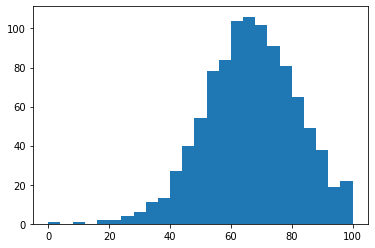

In [47]:
# Exibir histograma de cada disciplina
plt.hist(df['math score'], bins='auto')
plt.show()

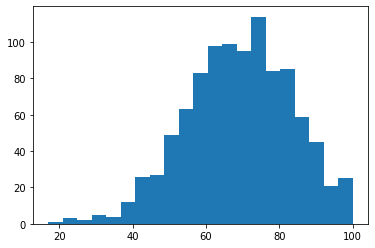

In [48]:
plt.hist(df['reading score'], bins='auto')
plt.show()

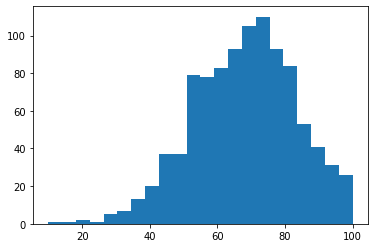

In [49]:
plt.hist(df['writing score'], bins='auto')
plt.show()

In [50]:
df.min()

gender                                     female
race/ethnicity                            group A
parental level of education    associate's degree
lunch                                free/reduced
test preparation course                 completed
math score                                      0
reading score                                  17
writing score                                  10
dtype: object

In [51]:
df.max()

gender                                     male
race/ethnicity                          group E
parental level of education    some high school
lunch                                  standard
test preparation course                    none
math score                                  100
reading score                               100
writing score                               100
dtype: object

In [52]:
# Cálculo da matriz de correlação e exibição do respectivo mapa de calor de todas as disciplinas
disciplinas_df = df.iloc [:, [5,6,7]]
#disciplinas_df.head()
matriz_correlacao = disciplinas_df.corr()
matriz_correlacao

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


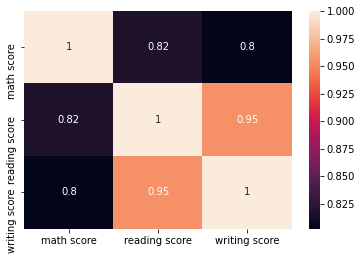

In [53]:
sn.heatmap(matriz_correlacao, annot=True)
plt.show()

## conclusão desta etapa

existe forte correção (maior que 0.9) entre as disciplinas de leitura (reading score) e escrita (writing score)

In [54]:
# Visualização 3D das notas das disciplinas separadas por cada grupo de estudantes

Visualização 3D das notas das disciplinas separadas por cada grupo de estudantes de acordo com "gender", "race/ethnicity", "parental level of education", "lunch" e "test preparation course". Para cada um desses parâmetros, realize uma única visualização (colocando os pontos de cada grupo em uma cor). Ao final, discorra se há algum padrão que pode ser detectado nessas análises; 

In [64]:
fig = px.scatter(df, x='writing score', y='gender' )
fig.show()

In [55]:
# Escrever as conclusões mais interessantes a respeito do dataset